# Práctica 1: Aprendizaje automático

__Fecha de entrega: XXX de YYY de 2022__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Práctica 1: Aprendizaje automático

__Fecha de entrega: XXX de YYY de 2022__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

## Apartado 3: Regresión

__Número de grupo: XX__

__Nombres de los estudiantes: XXX y XXX__

En este notebook trabajaremos con un conjunto de datos tomado del repositorio de la Universidad de California Irvine. En concreto, se trata de un conjunto de datos sobre distintos vinos del norte de Portugal (vinho verde)  que puedes encontrar [aquí](https://archive.ics.uci.edu/ml/datasets/wine+quality). 

El objetivo es modelar la calidad del vino (con un valor de 0 a 10) en base a variables que reflejan sus propiedades físicas y químicas. En concreto, las propiedades son las siguientes:
- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol 

De cara a la memoria que vas a realizar puedes investigar sobre estas propiedades para explicar mejor qué miden y cómo afectan al vino. 

La calidad del vino es una variable que toma valores entre 0 y 10. 

Para modelar la relación entre la calidad del vino y sus propiedades usaremos una red neuronal. 

### 1) Descripción de los datos

Carga el fichero de datos `calidad_vinos.csv` en un dataframe. 

Describe el conjunto de datos e identifica aquella variable que tiene unos valores extremos más acusados con respecto a la media, y aquella que está más concentrada en torno a la media. Reflexiona sobre la posible influencia de estas variables a la hora de entrenar el perceptrón multicapa.

Estudia la distribución de la calidad del vino en el conjunto de datos.

Cargamos el dataframe.

In [6]:
import pandas as pd
import numpy as np

data = pd.read_csv('calidad_vinos.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Vamos a analizar las variables.

<AxesSubplot:>

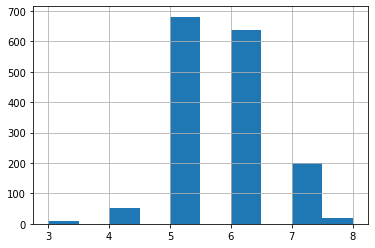

In [82]:
data['quality'].hist()

Vemos que las clases no están para nada equilibradas, y parecen seguir una distribución normal de media entre 5 y 6.

In [2]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Observando las variables hemos llegado a las siguientes conclusiones:

1) Las variables que presentan una mayor dispersión son las dos relacionadas con el **dióxido de azufre**. Sus medias son de 16 y 46, sus desviaciones típicas 10 y 32.

2) La variable que presenta una menor dispersión es, con diferencia, la **densidad**. Su media es de 1, y su desviación típica de 0.002. Otras como el **alcohol** y el **ph** también presentan una dispersión bastante baja.

### 2) Selección de variables

Calcula los coeficientes de correlación de Pearson entre la variable de salida y el resto de variables. Crea un nuevo dataframe que contenga el precio y, selecciona las variables que estén más correlacionadas con él (estableciendo para ello un valor umbral que consideres adecuado).

In [3]:
data.corr(method='pearson')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Podemos descartar `residual sugar`, `ph` y `free sulfur dioxide`, ya que son las únicas cuyo valor absoluto está por debajo de 0.1

Creamos el nuevo dataframe descartando estas variables:

In [3]:
df = data.copy(deep=True)
df.pop('residual sugar')
df.pop('pH')
df.pop('free sulfur dioxide')

df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,5
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,5
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,6
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5


### 3) Normalización

Decide si debes o no normalizar los datos de entrada y/o de salida. En caso afirmativo elige razonadamente entre escalarlos o estandarizarlos.


Vamos a preprocesar los datos para acortar el entrenamiento. Como hemos dicho que seguían una distribución normal, vamos a estandarizarlos.

In [110]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
df_std = df.copy(deep=True)

# Transformamos las variables de entrada


for c in df_std.columns[:-1]:
    
    std_scaler.fit(df_std[[c]])
    df_std[[c]] = std_scaler.transform(df_std[[c]])


std_scaler_output = StandardScaler()  
std_scaler_output.fit(df_std[['quality']]) 
df_std[['quality']] = std_scaler_output.transform(df_std[['quality']])

df_std.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.243707,-0.379133,0.558274,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.223875,0.624363,0.028261,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,0.096353,0.229047,0.134264,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.264960,0.411500,0.664277,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.243707,-0.379133,0.558274,-0.579207,-0.960246,-0.787823


### 4) Entrenamiento y selección

Crea dos redes neuronales de tipo Perceptrón Multicapa:
- La primera con una capa oculta de 250 neuronas
- La segunda con varias capas ocultas entre las que debes distribuir 250 neuronas, como te parezca

Asegúrate de que no salen warnings durante el entrenamiento indicando que no se ha alcanzado la convergencia durante el entrenamiento (para arreglarlo basta con poner un número de max_iter suficientemente grande).

En la configuración del perceptrón debes usar validación cruzada y explorar varios valores para el parámetro `alpha` que controla el coeficiente de regularización L2.

Para elegir el valor adecuado de dicho coeficiente pinta la curva de aprendizaje para cada perceptrón. En la curva debes pintar una línea que represente el error medio de las distintas particiones de validación y un área sombreada que represente la desviación típica. 

Una vez tengas la curva de aprendizaje: 
  - Identifica las diferencias de comportamiento entre ambos perceptrones, razona o especula sobre por qué se dan. ¿Hay alguno que domine al otro? ¿Es el comportamiento de uno más volátil que el del otro?
  - Determina de manera razonada con qué perceptrón te quedas y el valor óptimo del parámetro de regularización.


In [109]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

cv_scores_mean=[]
cv_scores_std=[]

# Entrenar y validar distintas configuraciones
regul_param_range = np.arange(0.1, 2.1, step=0.2) # [0.5, 0.75,  ..., 2]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(250), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=222)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, df_std.iloc[:, :-1], np.ravel(df_std.iloc[:, -1:]), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

cv_scores_mean, cv_scores_std

([-0.4374580305755428,
  -0.4240019247237859,
  -0.42341031133768414,
  -0.4218575352815369,
  -0.4175313147248919,
  -0.41728922882632186,
  -0.4172853028534549,
  -0.4177071400191951,
  -0.4200302951030029,
  -0.418959248531544],
 [0.027874528687123815,
  0.027765742123384084,
  0.026971088689353464,
  0.02562818231633352,
  0.02104586394573037,
  0.019560420041350283,
  0.018793780300404735,
  0.01836963171275639,
  0.019736182889758924,
  0.015426643458605598])

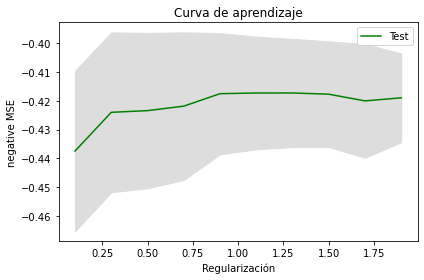

In [38]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(regul_param_range, cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit = np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(regul_param_range, lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [39]:
cv_scores_mean=[]
cv_scores_std=[]

# Entrenar y validar distintas configuraciones
regul_param_range = np.arange(0.1, 2.1, step=0.2) # [0.5, 0.75,  ..., 2]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(100, 50, 100), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=222)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, df_std.iloc[:, :-1], np.ravel(df_std.iloc[:, -1:]), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

cv_scores_mean, cv_scores_std

([-0.5899146566348243,
  -0.5081165557005463,
  -0.4712404354491844,
  -0.45054082117746763,
  -0.44083283019025704,
  -0.44152609435826917,
  -0.430382403088586,
  -0.42576067797100003,
  -0.4143556420092359,
  -0.4153500146841127],
 [0.05952921527578946,
  0.01748990556594537,
  0.024241863118175885,
  0.017738771164296403,
  0.02414426307392652,
  0.02139138023821954,
  0.034550465956093075,
  0.03167204444861568,
  0.02183384197345698,
  0.022991795147890702])

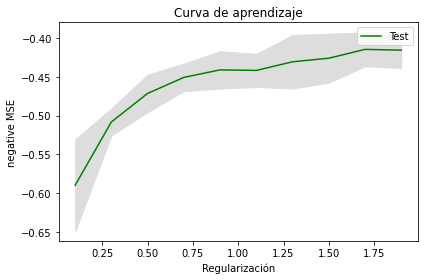

In [40]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(regul_param_range, cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit = np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(regul_param_range, lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Vemos que la primera red, con una sola capa oculta, se comporta de forma bastante estable para todos los valores de alfa.

En la segunda en cambio, parece disminuir el error a medida que aumenta alfa de forma logarítmica hasta llegar a alfa 1.7.

Vemos que el error mínimo lo hemos obtenido en la segunda red, con alfa = 1.7. Nos vamos a decantar por esta opcion.

### 5) Medición y análisis del error

Elige la mejor configuración del apartado anterior y usa la función `cross_val_predict` para realizar una predicción de la calidad de todos los vinos usando validación cruzada. 

A continuación:
- Muestra varias medidas de error y razona sobre si el error te parece pequeño o no para el problema que estás analizando
- Muestra el histograma de la distribución del error o del error en valor absoluto, y razona de nuevo si te parece que el modelo ha predicho bien o no. Identifica los vinos para los cuales el modelo ha fallado más.
- Analiza el error cometido para los vinos según su puntuación de calidad observada (3, 4, etc). Describe lo que sucede, explica por qué crees que sucedió y razona de nuevo si te parece que el modelo funciona bien o tiene limitaciones. 

In [94]:
from sklearn.model_selection import cross_val_predict
from sklearn.neural_network import MLPRegressor

notas_std = np.ravel(df_std.iloc[:, -1:])

# Creamos el clasificador
alfa = 1.7
mlp = MLPRegressor(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=1.7, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=222)
    
# estimamos 

predicts_scaled = cross_val_predict(mlp, df_std.iloc[:, :-1], notas_std)

predicts = std_scaler_output.inverse_transform(predicts_scaled.reshape(1, -1))[0]
predicts

array([5.06657795, 5.29593235, 5.35270487, ..., 5.94866854, 5.4831274 ,
       5.90003559])

Vamos a analizar varias medidas de error para sacar algunas conclusiones:

Error absoluto promedio: 0.5007055707972282
Desivación típica: 0.40137795087023787
Error absoluto medio en % sobre la media: 8.884023609684508 

Histograma de errores:


array([0.06657795, 0.29593235, 0.35270487, ..., 0.05133146, 0.4831274 ,
       0.09996441])

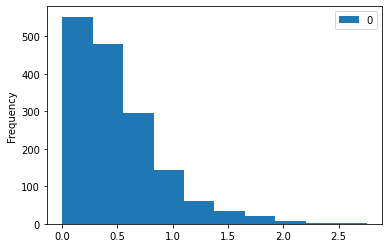

In [95]:

notas = np.ravel(df.iloc[:, -1:])

errors = np.abs(predicts - notas)
media = np.mean(errors)
std = np.std(errors)

pd.DataFrame(errors).plot.hist()

print("Error absoluto promedio:", media)
print("Desivación típica:", std)
print("Error absoluto medio en % sobre la media:", media / np.mean(notas) * 100, '\n')

print('Histograma de errores:')
errors

Vemos que el error promedio es del 0,5, con una desviación típica de 0,4.

Este error podría deberse a que estamos comparando variables discretas (notas reales) con variables continuas (las notas predecidas). Teniendo esto en cuenta, no parece a primera vista un error demasiado grande.

Diagrama de densidad de las puntuaciones:


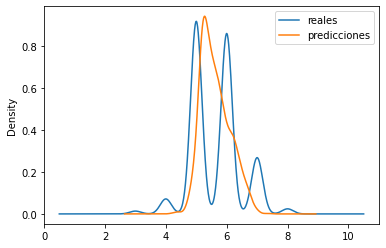

In [96]:
results = pd.DataFrame()

results['reales'] = notas
results['predicciones'] = predicts

results.plot.density()
print("Diagrama de densidad de las puntuaciones:")

Con este diagrama vemos que, al menos, el rango de notas es el mismo en las notas reales y en las predicciones es bastante similar.

La mayoría de las puntuaciones se encuentran en ambos casos entre 4 y 7, pero nuestro modelo a tenido dificultades prediciendo aquellos vinos que son peores o mejores de lo normal (los *outliers*). Como hay muy ejemplos en el dataset que se salgan del promedio, la red no está entrenada lo suficiente como para poder reconocerlos.

Vamos a probar ahora a redondear las notas predichas, para ver si conseguimos disminuir el error. (Haciendo esto speramos que desaparezcan aquellos errores que sean menores a 0.5)

Numero de fallos (redondeando): 646/1599 (40%)
Media de errores distinto de cero:  1.0773993808049536
Número de errores mayores que 1:  49
Error maximo:  3.0 

Error absoluto promedio: 0.5007055707972282
Desivación típica: 0.40137795087023787
Error absoluto medio en % sobre la media: 8.884023609684508 

Histograma de errores tras redondear:


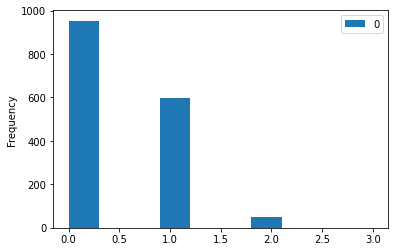

In [99]:
rounded_predicts = np.round(predicts)

errors_rounded = np.abs(rounded_predicts - notas)
media = np.mean(errors)
std = np.std(errors)

n_vinos = len(notas)

pd.DataFrame(errors_rounded).plot.hist()

print(f'Numero de fallos (redondeando): {np.count_nonzero(errors_rounded)}/{n_vinos} ({round(np.count_nonzero(errors_rounded)/n_vinos*100)}%)')
print('Media de errores distinto de cero: ', np.sum(errors_rounded) /  np.count_nonzero(errors_rounded))
print('Número de errores mayores que 1: ', len([x for x in errors_rounded if x > 1]))
print('Error maximo: ', np.max(errors_rounded), '\n')


print("Error absoluto promedio:", media)
print("Desivación típica:", std)
print("Error absoluto medio en % sobre la media:", media / np.mean(notas) * 100, '\n')

print('Histograma de errores tras redondear:')

Vemos que el modelo ha tenido un total de 646 fallos en las 1600 predicciones que ha realizado (Un 40%).

Sin embargo, vemos que la gran mayoría de estos errores es por un punto arriba/abajo, ya que solo hay un total de 52 errores mayores que 1. Estos errores se deben principalmente a aquellos vinos atípicos cuya calificacion no está entre 4,5 y 6,5, lo cual coincide con los resultados que vimos anteriormente.

Vamos ahora a analizar los fallos en cada uno da las categorías, para ver que puntuaciones suele acertar más el clasificador, y cuales suele fallar. Con los datos analizados anteriormente, esperamos una cantidad moderada de fallos pequeños en los vinos de calidad intermedia, y fallos mas grandes en los vinos de calidad mala y buena.

In [106]:
grupos = df[['quality']].copy(deep=True)
grupos['predicciones'] = predicts

grupos.groupby('quality').describe()

predicciones                                                    \
               count      mean       std       min       25%       50%   
quality                                                                  
3               10.0  5.072296  0.355250  4.441757  4.925011  5.039000   
4               53.0  5.286580  0.395642  4.215833  5.040898  5.268046   
5              681.0  5.360290  0.319864  4.359441  5.161396  5.297826   
6              638.0  5.747880  0.417074  4.693140  5.440847  5.700425   
7              199.0  6.192277  0.404998  5.120463  5.918562  6.209162   
8               18.0  6.408032  0.273943  5.946548  6.218080  6.362750   

                             
              75%       max  
quality                      
3        5.250207  5.753764  
4        5.507053  6.150348  
5        5.532431  7.357978  
6        6.038204  7.006081  
7        6.487615  6.997123  
8        6.659903  6.831795

Efectivamente, aquí se aprecia claramente que los vinos de nota 5 y 6 son clasificados correctamente, pero los de otras puntuaciones no.

### Conclusiones

La principal conclusión a los vinos del dataset no están suficientemente equilibrados con respecto a la nota como para poder predecir valores más bajos/altos del promedio. Creemos que si las notas del dataset fueran más dispares, el clasificador habría sido mucho más capaz de identificar vinos malos o sobresalientes.

Por último, no nos preocupan demasiado los errores en los que el clasificador se equivoca por un solo punto de diferencia, ya que es tratandose de un tema relativamente subjetivo no deberían tener mucha importancia (No creemos que si varios catadores probasen el mismo vino, todos le darían exactamente la misma nota, sino que probablemente sus notas estarían comprendidas en un intervalo de 1 o 2 puntos).